Задача. Частица массы m=1 движется без трения (консервативная система) по прямой OX в потенциаое U(x)

 $$U(x)=\frac{x^4}{4}+\frac{x^3}{3}-x^2$$

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [5]:
def potential():
  def rhs(t, X):
    x, y = X
    return [y, -x**3.-x**2.+2.*x]
  return rhs

def find_eq(): # equilibrium
  def quad_eq_solve(a, b, c):
    D = b**2. - 4.*a*c
    r1 = (-b + np.sqrt(D))/2.
    r2 = (-b - np.sqrt(D))/2.
    return r1, r2
  x1, x2 = quad_eq_solve(1., 1., -2.)
  x3 = 0.
  eq = np.array([(x1, 0.),(x2, 0.), (x3, 0.)])
  return eq

def eigenvectors(t, eq): 
  def jacobian(t, eq):
    def diff_rhs(t, X):
      x, y = X
      return -3.*x**2-2.*x+2.
    J = np.array([[0., 1.],[diff_rhs(t, eq), 0.]]) 
    return J
  J = jacobian(t, eq)
  W, V = np.linalg.eig(J)
  return V

def eq_quiver(rhs, limits, N=16):
  xlims, ylims = limits
  xs = np.linspace(xlims[0], xlims[1], N)
  ys = np.linspace(ylims[0], ylims[1], N)
  U = np.zeros((N,N))
  V = np.zeros((N,N))
  for i, y in enumerate(ys):
    for j, x in enumerate(xs):
      vfield = rhs(0., [x, y])
      u, v = vfield
      U[i][j] = u
      V[i][j] = v
  return xs, ys, U, V

def x_t(rhs, times, point = (0, 0), color = 'b', marker = '-'):
  sol = solve_ivp(rhs, times, point, method = 'RK45', rtol = 1e-12)  
  xs, ys = sol
  plt.plot(xs, ys, color, marker)

def plotOnPlane(rhs, limits):
  plt.close()
  plt.figure(figsize=(9, 9))
  xlims, ylims = limits
  plt.xlim([xlims[0], xlims[1]])
  plt.ylim([ylims[0], ylims[1]])
  xs, ys, U, V = eq_quiver(rhs, limits)
  plt.quiver(xs, ys, U, V, alpha = 0.6)

def plotTraj(rhs, times, point, color = 'b', marker = '-'): # trajectory
  sol = solve_ivp(rhs, times, point, method = 'RK45', rtol = 1e-12) 
  xs, ys = sol.y
  plt.plot(xs, ys, color, marker)

def plotEq(eq):
  plt.scatter(eq[0][0], eq[0][1], marker = 'o', c = 'blue') 
  plt.scatter(eq[1][0], eq[1][1], marker = 'o', c = 'blue') 
  plt.scatter(eq[2][0], eq[2][1], marker = 'x', c = 'red')  
  
def plotSep(rhs, times_plus, times_minus, eq, V): # separatrix
  color = 'y'
  marker = '-'
  eq_tmp = np.copy(eq)
  V_tmp = np.copy(V)
  eq_tmp_0 = eq_tmp + V_tmp[0]*(1e-3) # сдвиг точки
  eq_tmp_2 = np.array([-eq_tmp_0[0], -eq_tmp_0[1]]) # отражение точки по вертикали
  eq_tmp_1 = eq_tmp - V_tmp[0]*(1e-3)
  eq_tmp_3 = np.array([-eq_tmp_1[0], -eq_tmp_1[1]])
  plotTraj(rhs, times_plus, eq_tmp_0, color, marker)
  plotTraj(rhs, times_plus, eq_tmp_1, color, marker)
  plotTraj(rhs, times_minus, eq_tmp_2, color, marker)
  plotTraj(rhs, times_minus, eq_tmp_3, color, marker)
  
def x_t_sep(rhs, times_plus, times_minus, eq, V):
  color = 'y'
  eq_tmp = np.copy(eq)
  V_tmp = np.copy(V)
  eq_tmp_0 = eq_tmp + V_tmp[0]*(1e-3)
  eq_tmp_2 = np.array([-eq_tmp_0[0], -eq_tmp_0[1]])
  eq_tmp_1 = eq_tmp - V_tmp[0]*(1e-3)
  eq_tmp_3 = np.array([-eq_tmp_1[0], -eq_tmp_1[1]])
  x_t_sep_ax(rhs, times_plus, times_minus, eq_tmp_0, eq_tmp_2, color)
  x_t_sep_ax(rhs, times_plus, times_minus, eq_tmp_1, eq_tmp_3, color)
  
def x_t_sep_ax(rhs, times_plus, times_minus, point_1, point_2, color):
  fig, axes = plt.subplots(1, 2, figsize=(10, 10))
  sol_0 = solve_ivp(rhs,  times_plus, point_1, method = 'RK45', rtol=1e-12)
  sol_1 = solve_ivp(rhs, times_minus, point_2, method = 'RK45', rtol=1e-12)
  xs_0, ys_0= sol_0.y
  ts_0 = sol_0.t
  xs_1, ys_1= sol_1.y
  ts_1 = sol_1.t
  axes[0].plot(ts_0, xs_0, color)
  axes[1].plot(ts_1, xs_1, color)
    
def x_t(rhs, times, point, color):
  limits=[(-3.0,3.0),(-3.0,3.0)]
  sol = solve_ivp(rhs, times, point, method = 'RK45', rtol=1e-12)
  xs, ys= sol.y
  ts = sol.t
  plt.plot(ts, xs, color)

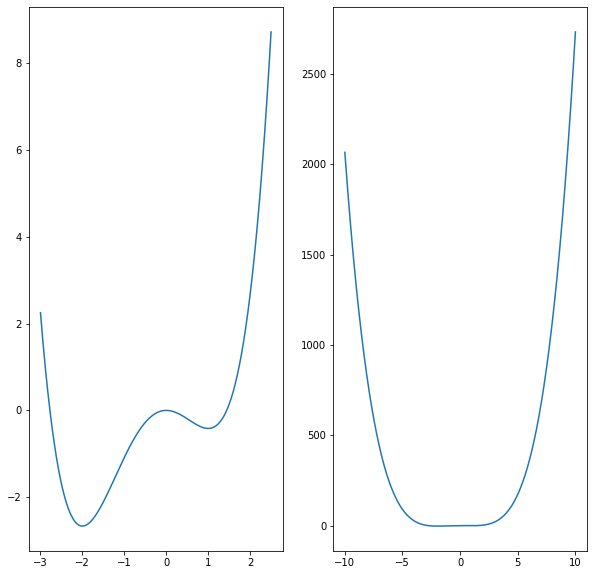

In [6]:
def U(x):
    return ((x**4)/4 + (x**3)/3 - x**2)
fig, axes = plt.subplots(1, 2, figsize=(10, 10))
x1 = np.linspace(-3, 2.5, 1000)
x2 = np.linspace(-10, 10, 1000)
axes[0].plot(x1, U(x1))
axes[1].plot(x2, U(x2))
plt.show()

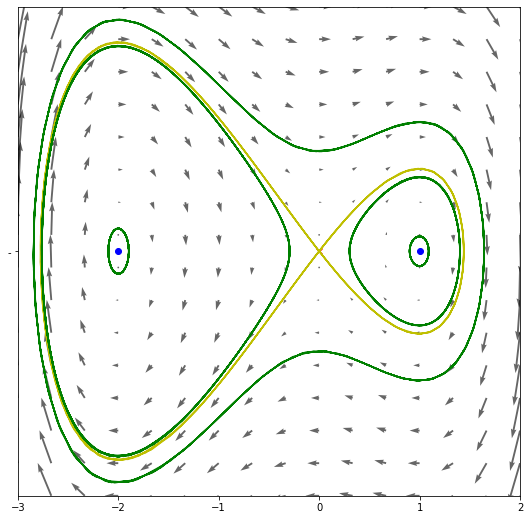

In [7]:
rhs = potential()
eq = find_eq()
V = eigenvectors(0., eq[2])
plotOnPlane(rhs, [(-3., 2.), (-2.7, 2.7)])
plotSep(rhs, [0., 40.], [0., -10.], eq[2], V)
plotTraj(rhs,[0., 40.], (0., 1.1), 'g')
plotTraj(rhs,[0., 40.], (0.9, 0.), 'g')
plotTraj(rhs,[0., 40.], (0.3, 0.), 'g')
plotTraj(rhs,[0., 40.], (-2.1, 0.), 'g')
plotTraj(rhs,[0., 40.], (-0.3, 0.1), 'g')
plotEq(eq)

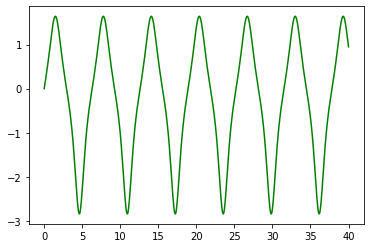

In [8]:
x_t(rhs,[0., 40.], (0., 1.1), 'g')

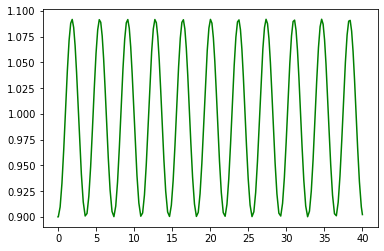

In [9]:
x_t(rhs,[0., 40.], (0.9, 0.), 'g')

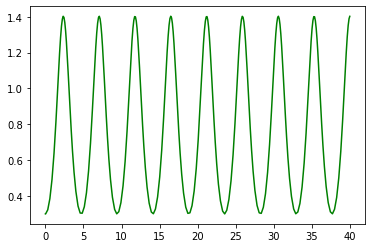

In [10]:
x_t(rhs,[0., 40.], (0.3, 0.), 'g')

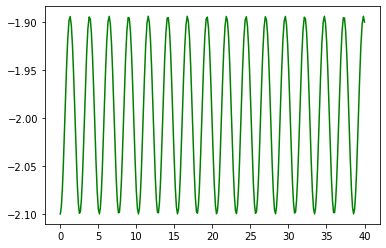

In [11]:
x_t(rhs,[0., 40.], (-2.1, 0.), 'g')

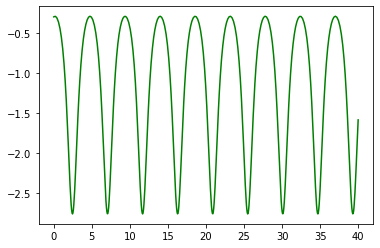

In [12]:
x_t(rhs,[0., 40.], (-0.3, 0.1), 'g')

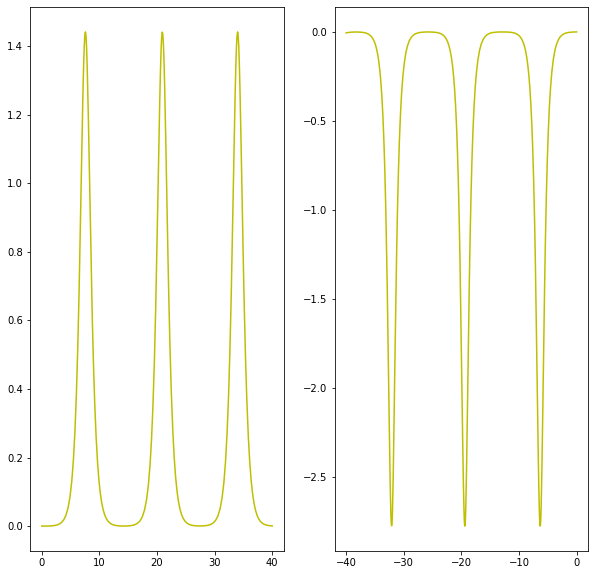

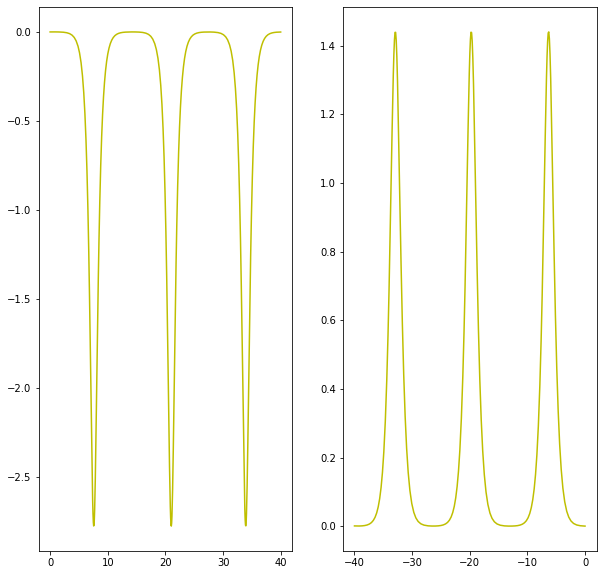

In [14]:
x_t_sep(rhs, [0., 40.],[0., -40.], eq[2], V)